# GOTTA CATCH'EM ALL

**In this notebook, I will use Seaborn library to visualize pokemon data**

**Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.**

**You can visit the doc from <a href="https://seaborn.pydata.org/index.html" >here</a> to get more help if you need from**

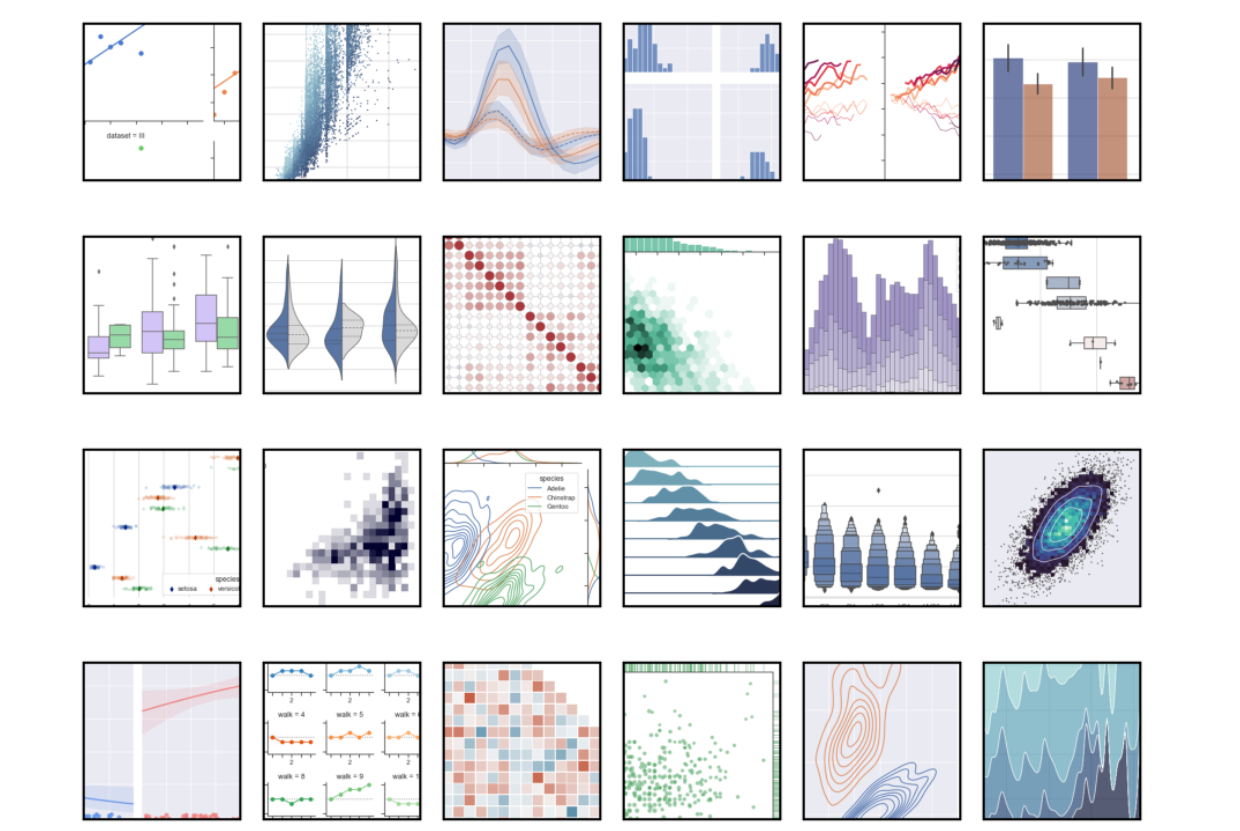

**Table of Contents**
* Plots

    - [Lmplot](#lm)
    - [Heatmap](#heatmap)
    - [Boxplot](#box)
    - [Distplot](#dist)
    - [Kdeplot](#kde)
    - [Violinplot](#violin)
    - [Swarmplot](#swarm)
    - [PieChart](#pie)
    - [Countplot](#count)
    - [Jointplot](#joint)
    - [Pairplot](#pair)

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
df = pd.read_csv('../input/pokemon/Pokemon.csv', index_col=False)

# We read pokemon.csv through 'Pandas'.read_csv(x) function
# param: x is the path of the csv file
# Then we assign dataframe as df(name can differ)

In [ ]:
df.head()
# .head() gives you the first 5 rows of the dataframe

In [ ]:
df.tail()
# .tail() gives you the last 5 rows of the dataframe

In [ ]:
df.sample(10) # You can change to number to your personal choise
# .sample() provides random rows of data 

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df_leg =df[df['Legendary']==True]  #Showing the legendary pokemons

In [ ]:
df_leg_1 = df_leg[df_leg['Generation'] == 1]
df_leg_1
# First Generation Legendary Pokemons

In [ ]:
df_leg_2 = df_leg[df_leg['Generation'] == 2]
df_leg_2
# Second Generation Legendary Pokemons

In [ ]:
df_strongest = df[df['Attack'] > 170]
df_strongest

**Strongest Pokemon is : MewtwoMega Mewtwo X**

In [ ]:
df_fastest = df[df['Speed'] > 150]
df_fastest

**Fastest Pokemon is : DeoxysSpeed Forme**

In [ ]:
a=df.groupby(['Generation','Type 1']).count().reset_index()
a=a[['Generation','Type 1','Total']]
a=a.pivot('Generation','Type 1','Total')
a[['Water','Fire','Grass','Dragon','Normal','Rock','Flying','Electric']].plot(color=['b','r','g','#FFA500','brown','#6666ff','#001012','y'],marker='o')
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

<a id="lm"></a>
# Lmplot

In [ ]:
sns.lmplot(x='Attack', y='Defense', data=df, line_kws={'color': 'red'})

In [ ]:
plt.figure(figsize=(15,10))
sns.lmplot(x='Attack', y='Defense', data=df, fit_reg=False, hue='Legendary')

<a id="heatmap"></a>
# Heatmap

In [ ]:
# Correlation map
plt.rcParams['figure.figsize']=(15,8)
heat_map = sns.heatmap(df[[ 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']].corr(), annot = True, linewidths=1, cmap='Blues')
heat_map.set_title(label='Correlation Map', fontsize=20)
heat_map;


<a id="box"></a>
# Box Plot

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

In [ ]:
stats_df = df.drop(['Total', 'Legendary', 'Generation', '#'], axis=1)
plt.figure(figsize=(15,10))
sns.boxplot(data=stats_df)

In [ ]:
stats_df

<a id="dist"></a>
# Dist Plot

In [ ]:
f, ax = plt.subplots(figsize=(10,8))
x = df['Attack']
ax = sns.distplot(x, bins=10, color="tab:red")
plt.show()
# This is some kind of histogram grap about Attack

In [ ]:
f, ax = plt.subplots(figsize=(10,8))
x = df['Defense']
ax = sns.distplot(x, bins=10, color="tab:green")
plt.show()
# This is some kind of histogram grap about Defense

<a id="kde"></a>
# Kde Plot

In [ ]:
plt.figure(figsize=(15,10))
sns.kdeplot(df.Attack, df.Defense)
plt.show()

**You can get the color codes of pokemon types from <a href= https://bulbapedia.bulbagarden.net/wiki/Category:Type_color_templates> Bulbapedia </a> to help us create a new color palette**

In [ ]:
pkmn_type_colors = ['#78C850', # Grass
                    '#F08030', # Fire
                    '#6890F0', # Water
                    '#A8B820', # Bug
                    '#A8A878', # Normal
                    '#A040A0', # Poison
                    '#F8D030', # Electric
                    '#E0C068', # Ground
                    '#EE99AC', # Fairy
                    '#C03028', # Figthing
                    '#F85888', # Psychic
                    '#B8A038', # Rock
                    '#705898', # Ghost
                    '#98D8D8', # Ice
                    '#7038F8', # Dragon
                   
                   ]

<a id="violin"></a>
# Violinplot

In [ ]:
plt.figure(figsize=(15,10))
sns.violinplot(x = 'Type 1', y='Attack', data=df, palette=pkmn_type_colors)


<a id="swarm"></a>
# Swarmplot

In [ ]:
plt.figure(figsize=(15,10))
sns.swarmplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors)


In [ ]:
plt.figure(figsize=(15,10))
sns.swarmplot(x='Type 1', y='Defense', data=df, palette=pkmn_type_colors)


<a id="pie"></a>
# Pie Chart

In [ ]:
#kill.race.dropna(inplace = True)
labels = df['Type 1'].value_counts().index
explode = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
sizes = df['Type 1'].value_counts().values

# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=pkmn_type_colors, autopct='%1.1f%%')
plt.title('Pokemon According to Type-1',color = 'blue',fontsize = 15)

In [ ]:
#df_type2 = df['Type 2'].dropna(inplace = True)
labels = df['Type 2'].value_counts().index
explode = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
sizes = df['Type 2'].value_counts().values

# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors = pkmn_type_colors, autopct='%1.1f%%')
plt.title('Pokemon According to Type-2',color = 'blue',fontsize = 15)

<a id="count"></a>
# Count Plot

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
plt.xticks(rotation = 45)
plt.show()

Most Seen First Types of Pokemons
* Water
* Normal
* Grass
* Bug
* Psychic

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='Type 2', data=df, palette=pkmn_type_colors)
plt.xticks(rotation = 45)
plt.show()

Most Seen Second Types of Pokemons
* Flying
* Ground
* Poison
* Psychic
* Fighting

<a id="joint"></a>
# Joint Plot

In [ ]:
plt.figure(figsize=(15,10))
sns.jointplot(x='Attack', y='Defense', kind='hex', data=df , color= 'green')
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
sns.jointplot(x="Sp. Atk", y="Sp. Def", data=df,kind ="hex",color = 'red'); #comparing special attack and speed

<a id="pair"></a>
# Pair Plot

In [ ]:
plt.figure(figsize=(15,10))
sns.pairplot(data=df, hue = 'Generation')
plt.show()

# Thank you for reading


# If you enjoyed my work, please consider upvoting


# More of my work:

**Stroke EDA and Classification(%94.60 Accuracy)**

- https://www.kaggle.com/umutalpaydn/stroke-eda-and-classification-94-60-accuracy

**Heart-Disease Analysis & Classification**

- https://www.kaggle.com/umutalpaydn/heart-disease-analysis-classification

**VideoGameSales EDA**

- https://www.kaggle.com/umutalpaydn/videogamesales-eda

**Iris Classification KNN & Logistic Regression**

- https://www.kaggle.com/umutalpaydn/iris-classification-knn-logistic-regression